# Maximizing revenues of online Advertising with Thompson sampling

In [3]:
# Importing the libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random

# Define the environment

In [5]:
# Setting the parameters
N = 10000   # number of rounds - customer visiting web page with Ad
d = 9       # number of strategies

In [6]:
# Creating the simulation (for 9 strategies here)
# These are unknown in a real business case - for simulation only
conversion_rates = [0.05,0.13,0.09,0.16,0.11,0.04,0.20,0.08,0.01]

In [7]:
# Create the reward matrix (num of rounds x result for each strategy)
rewards = np.zeros((N,d))
# populate matrix according to the conversion rates
for i in range(N):
    for j in range(d):
        if np.random.rand() <= conversion_rates[j]:   # np.random.rand(d0, d1, ..., dn) returns Random values [0,1[ in a given shape d0xd1x...
            rewards[i,j] = 1

In [8]:
print(rewards)
print(rewards.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 1. 0. 0.]]
(10000, 9)


In [9]:
max_rewards = rewards.sum(axis=0)
print(max_rewards)

[ 510. 1291.  936. 1604. 1062.  389. 2033.  802.   96.]


# Implement random strategy and Thompson Sampling for comparison

In [11]:
selected_strategies_random = []
selected_strategies_thompson = []
total_rewards_random = 0
total_rewards_thompson = 0
strategies_alpha = np.ones(d)
strategies_beta = np.ones(d)
reward_per_strategy = np.zeros(d)
regret_curve_random = []
regret_curve_thompson = []

for n in range(N):

    # Random strategy
    selected_strategy_random = random.randrange(d)
    selected_strategies_random.append(selected_strategy_random)
    total_rewards_random+= rewards[n,selected_strategy_random]

    # Thompson Sampling Strategy
    max_random_beta = 0
    startegy_with_max_beta = 0

    # for each strategy, random draw from beta distribution with 2 parameters (alpha & beta) then select highest
    for i in range(d):
        random_beta = random.betavariate(strategies_alpha[i], strategies_beta[i]) # return value in range 0,1
        if random_beta > max_random_beta:
            max_random_beta = random_beta
            startegy_with_max_beta_draw = i

    # Update Beta distribution parameters of selected strategy
    if rewards[n,startegy_with_max_beta_draw]==1:
        strategies_alpha[startegy_with_max_beta_draw]+=1
    else:
        strategies_beta[startegy_with_max_beta_draw]+=1

    # Update Thompson sampling strategy KPIs
    selected_strategies_thompson.append(startegy_with_max_beta_draw)
    total_rewards_thompson += rewards[n,startegy_with_max_beta_draw]

    # Score per strategy
    for i in range(d):
        reward_per_strategy[i] +=rewards[n, i]

    # Regret as the difference between slected strategy and best strategy
    regret = max(reward_per_strategy) - total_rewards_random
    regret_curve_random.append(regret)
    regret = max(reward_per_strategy) - total_rewards_thompson
    regret_curve_thompson.append(regret)

In [12]:
print(max(reward_per_strategy))

2033.0


In [13]:
total_rewards_random

971.0

In [14]:
total_rewards_thompson

1909.0

# Measure performance

In [16]:
# Computing the Absolute and Relative Return
# in absolute monetary value assuming 1K$ extra revenue for each premium plan
absolute_return = (total_rewards_thompson - total_rewards_random) * 1
# profit increase in % vs random strategy
relative_return = (total_rewards_thompson - total_rewards_random) / total_rewards_random * 100

In [17]:
print(f'Performance achieved over {N} samples and the assumed strategy conversion rate:')
print('Absolute return: {:.0f} K$ extra profits'.format(absolute_return))
print('Relative return: {:.0f} % profit increase'.format(relative_return))

Performance achieved over 10000 samples and the assumed strategy conversion rate:
Absolute return: 938 K$ extra profits
Relative return: 97 % profit increase


# Plot histogram of selected strategies

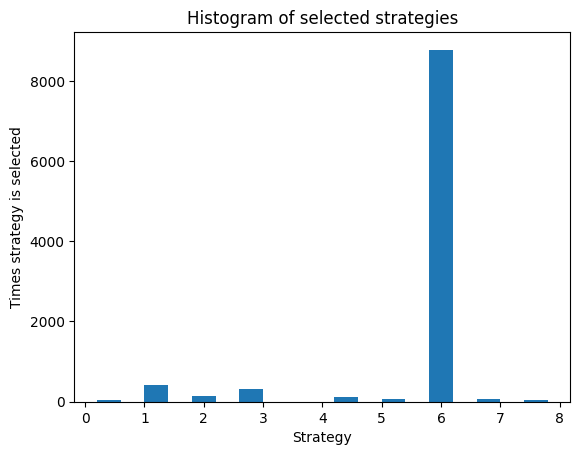

In [19]:
%matplotlib inline
plt.hist(selected_strategies_thompson, align='mid', rwidth=0.5)
plt.title('Histogram of selected strategies')
plt.xlabel('Strategy')
plt.ylabel('Times strategy is selected')
plt.show()

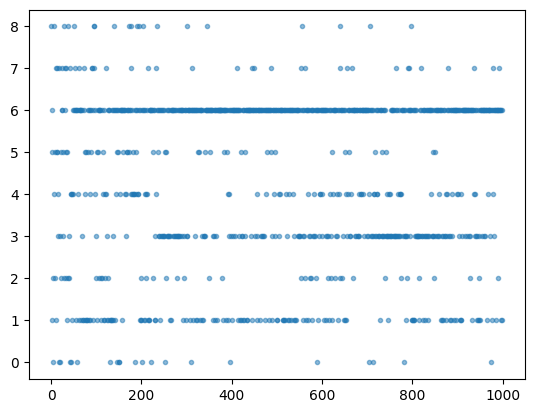

In [20]:
plt.scatter(range(1000), selected_strategies_thompson[:1000], marker='.', alpha=0.5) ## showing best convergence

# Regret curves
**Regret Curve** is a graphical representation that measures the difference between the cumulative reward obtained by the agent following the Thompson sampling strategy and the cumulative reward that could have been obtained by following the optimal strategy.

**Cumulative Reward**: This refers to the total reward accumulated by the agent over a period of time as it interacts with the environment. In the context of Thompson sampling, the reward is typically a measure of success or utility achieved by the agent, such as the number of clicks, conversions, or revenue generated from selecting a particular action.

**Regret**: The regret at each timestep is defined as the difference between the reward obtained by the agent and the reward that could have been obtained by following the optimal/best strategy.

**Optimal/Best Strategy**: The optimal strategy represents the action that would have yielded the maximum reward if chosen at each timestep. In practice, it may not be known a priori and may need to be estimated based on historical data or through simulation.



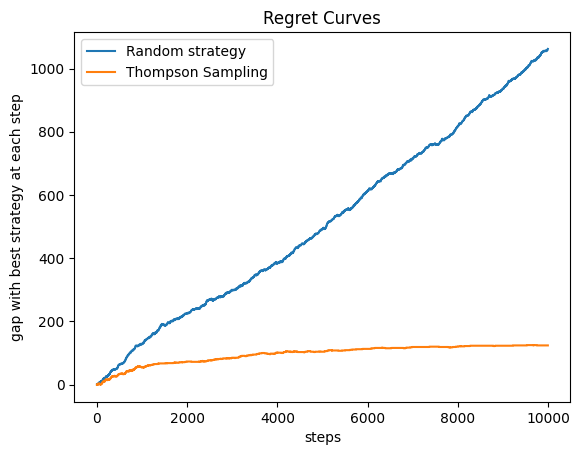

In [22]:
%matplotlib inline
plt.plot(regret_curve_random, label='Random strategy')
plt.plot(regret_curve_thompson, label='Thompson Sampling')
plt.title('Regret Curves')
plt.legend(loc='upper left')
plt.xlabel('steps')
plt.ylabel('gap with best strategy at each step')
plt.savefig('random.png')
plt.show()

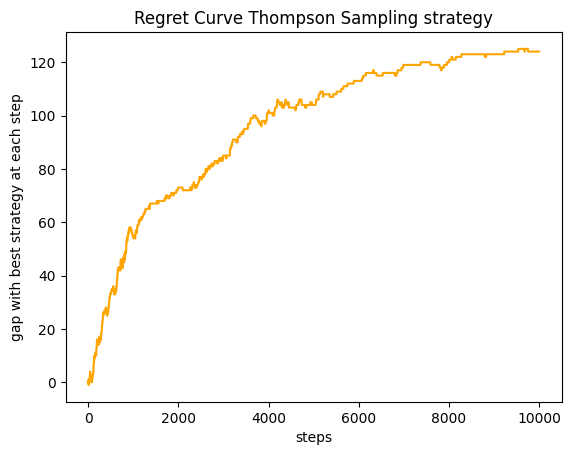

In [23]:
plt.plot(range(N), regret_curve_thompson, color='orange')
plt.title('Regret Curve Thompson Sampling strategy')
plt.xlabel('steps')
plt.ylabel('gap with best strategy at each step')
plt.savefig('thompson.png')
plt.show()